In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly.plotly as py

import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs  as pgo
init_notebook_mode() 

In [29]:
table2=pd.read_pickle('validations_stif')
table2.dtypes

CATEGORIE_TITRE
AMETHYSTE                  float64
AUTRE TITRE                float64
FGT                        float64
IMAGINE R                  float64
NAVIGO                     float64
NON DEFINI                 float64
TST                        float64
LDA_ID_REF_A               float64
etudiant                   float64
solidaire                  float64
ameth                      float64
ZDEr_ID_REF_A                int64
ZDEr_NOM                    object
ZDEr_ID_TYPE_ARRET           int64
ZDEr_LIBELLE_TYPE_ARRET     object
ZDEr_X_Y                    object
ZDLr_ID_REF_A                int64
ZDLr_NOM                    object
ZDLr_ID_TYPE_ARRET           int64
ZDLr_LIBELLE_TYPE_ARRET     object
LDA_NOM                     object
LDA_ID_TYPE_ARRET            int64
LDA_LIBELLE_TYPE_ARRET      object
X                          float64
Y                          float64
dtype: object

In [30]:
table3=table2
x=table3['X']
y=table3['Y']
colorrange=  {1: "red", 2: "blue", 6:"green"}
text=table3['LDA_NOM']
table3.replace({'LDA_ID_TYPE_ARRET': colorrange},inplace=True)
c=table3['LDA_ID_TYPE_ARRET']
c.head(5)

0    red
1    red
2    red
3    red
4    red
Name: LDA_ID_TYPE_ARRET, dtype: object

In [31]:
data = pgo.Data ([
        pgo.Scatter(  
        x=x,     
        y=y,
        mode='markers',
        marker = pgo.Marker(size=table3['NAVIGO']/1000000+5,
                                    sizeref=table3['etudiant'],
                                    opacity=0.5,
                                    color=table3['LDA_ID_TYPE_ARRET']),
        text=table3['LDA_NOM']
        )])    
    

layout = pgo.Layout(
    title= 'Arrêts en Ile de France',
    height = 800,
    xaxis=pgo.XAxis(
        showgrid=False,
        zeroline=True,
        showticklabels=False),
    yaxis=pgo.YAxis(
        showgrid=False,
        zeroline=True,
        showticklabels=False))

fig2 = pgo.Figure(data=data, layout=layout)

iplot(fig2)

In [32]:
table4=table2
table4[['LDA_NOM','NAVIGO']].set_index('LDA_NOM')
table4.sort_values(['NAVIGO'], ascending=['NAVIGO'], inplace=True)
data1 = pgo.Data([
    pgo.Bar(
            y=table4['LDA_NOM'],
            x=table4['NAVIGO'],
            orientation='h'
    )
])

layout1 = pgo.Layout(
    title='Les gares voyant le plus de Navigo',
    height=15000,
    width=1121,
    margin=pgo.Margin(l=200)  # add left margin for y-labels are long
)

fig1 = pgo.Figure(data=data1, layout=layout1)
py.iplot(fig1, filename='hist_gare', width=500, height=1000)


CATEGORIE_TITRE  NAVIGO                                LDA_NOM
0                   289                     Thieux Nantouillet
1                   507            Vulaines-sur-Seine Samoreau
2                   596                              Chaponval
3                   626                       Dourdan la Forêt
4                   824                       Vernou-sur-Seine
5                   938                                 Vosves
6                  1112                               Épluches
7                  1124                         Compans (Gare)
8                  1191  Saint-Germain-en-Laye Grande Ceinture
9                  1231                                Thomery
10                 1473                    Gare de Bercy (RER)
11                 1484                      Guillerval (Gare)
12                 1547                           Montry Condé
13                 1649                 Montgeroult Courcelles
14                 1657                           Seugy

C:\Users\Bricolo\Anaconda3\envs\lty\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



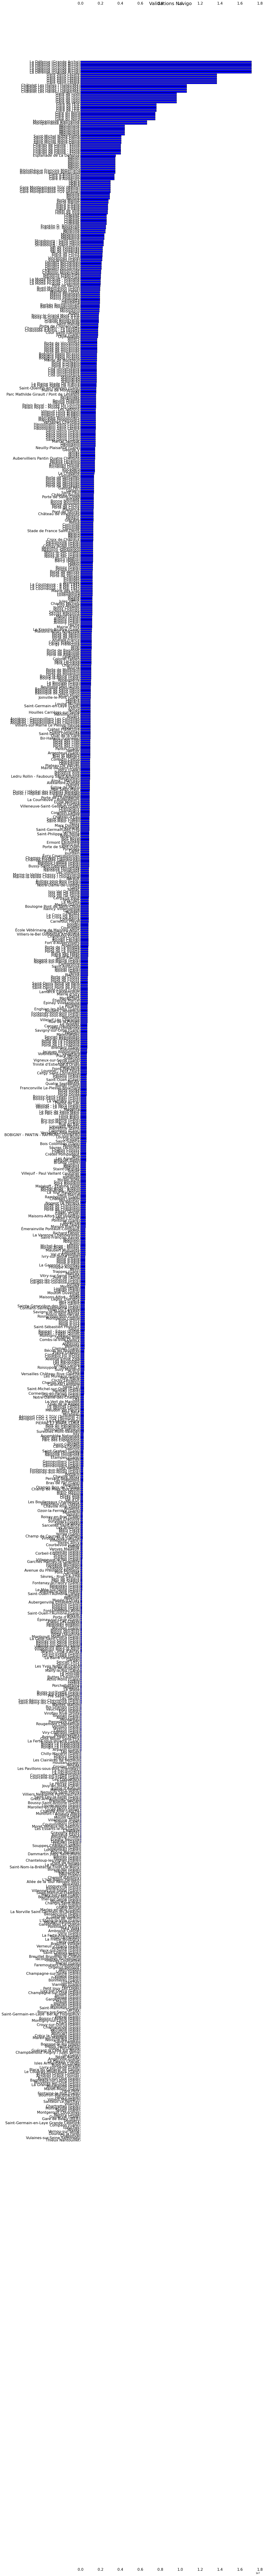

In [33]:
table5=table2

table6=table5[['NAVIGO', 'LDA_NOM']]
table6.sort_values(['NAVIGO'], ascending=['NAVIGO'], inplace=True)
table6.reset_index(drop=True, inplace=True)
LABELS=table6['LDA_NOM']
print(table6.head(20))


fig = plt.figure(figsize=[14,200])
ax1 = plt.subplot(1,1,1)

plt.barh(table6.index,table6['NAVIGO'],align='center')

ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)

plt.yticks(table6.index, LABELS, fontsize=4)

# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on",labeltop="on", left="off", right="off", labelleft="on",labelsize=16)
plt.title('Validations Navigo', fontsize=20)

plt.show()

In [34]:
print(table5.tail(20))


CATEGORIE_TITRE  AMETHYSTE  AUTRE TITRE     FGT  IMAGINE R    NAVIGO  \
900                 219965      1030128  571987    1579537   9617767   
899                 219965      1030128  571987    1579537   9617767   
901                 219965      1030128  571987    1579537   9617767   
902                 219965      1030128  571987    1579537   9617767   
898                 219965      1030128  571987    1579537   9617767   
952                 274551       462494  841358    2677145  10646095   
954                 274551       462494  841358    2677145  10646095   
953                 274551       462494  841358    2677145  10646095   
951                 274551       462494  841358    2677145  10646095   
599                 275257       503580  824471    2660317  13656103   
603                 275257       503580  824471    2660317  13656103   
600                 275257       503580  824471    2660317  13656103   
601                 275257       503580  824471    2660317  1365